<a href="https://colab.research.google.com/github/oreomcflurryyy/data-analysis/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d himanshunakrani/iris-dataset

!unzip "iris-dataset"

##Exploratory Data Analysis

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

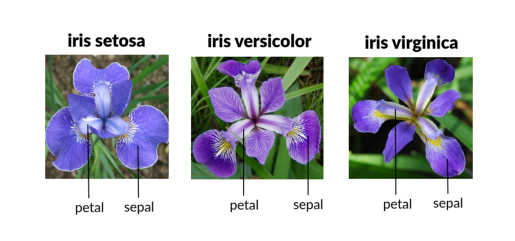

In [372]:
img = Image.open('/content/1_nfK3vGZkTa4GrO7yWpcS-Q.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [341]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [342]:
iris.shape

(150, 5)

In [343]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


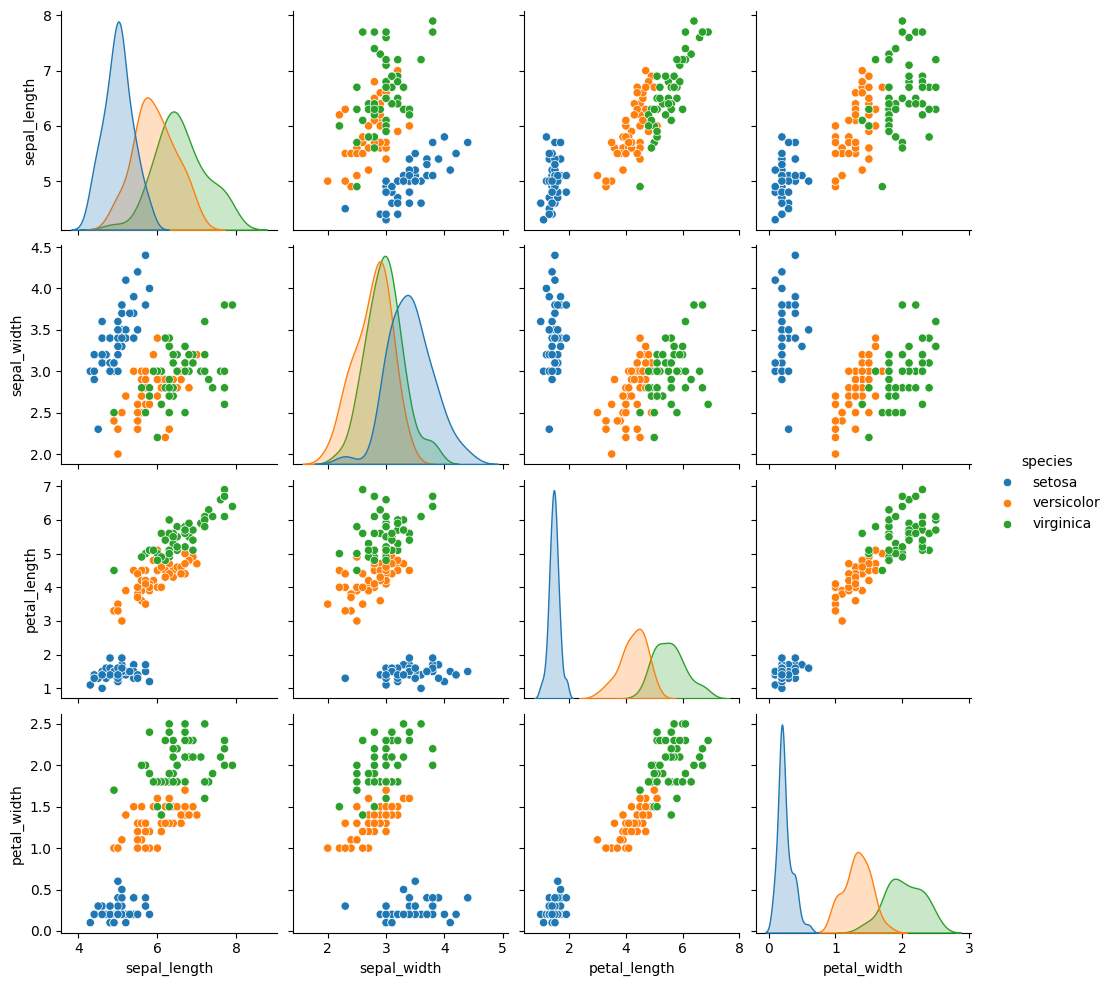

In [344]:
sns.pairplot(iris, hue='species')
plt.show()

### Petal Dimensions
- **Iris Setosa**:
  - Petal Width: 0 - 0.75 cm
  - Petal Length: 1 - 2 cm
  - *Observation*: Setosa has the smallest petals among the three species.

- **Iris Virginica**:
  - Petal Width: 1.5 - 2.5 cm
  - Petal Length: 4.5 - 7 cm
  - *Observation*: Virginica has the largest petals.

- **Iris Versicolor**:
  - Petal Width: 1 - 1.5 cm
  - Petal Length: 3 - 5 cm
  - *Observation*: Versicolor lies in between Setosa and Virginica in terms of petal dimensions.

### Sepal Dimensions
- **Iris Setosa**:
  - Sepal Width: 3 - 4.5 cm
  - Sepal Length: 4 - 6 cm
  - *Observation*: Setosa has relatively square-shaped sepals with comparable dimensions.

- **Iris Versicolor and Iris Virginica**:
  - Sepal Width: 2 - 3.5 cm
  - Sepal Length: 5 - 8 cm
  - *Observation*: Both Versicolor and Virginica have elongated sepals compared to Setosa.


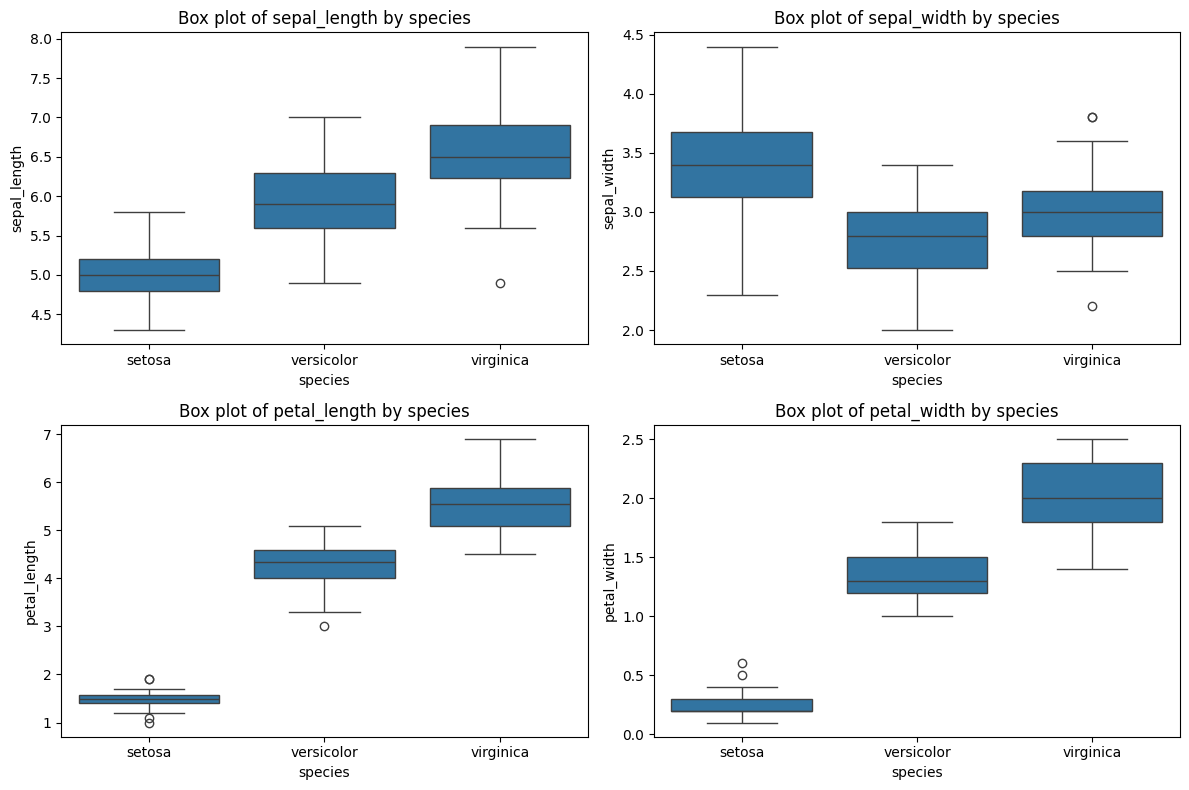

In [345]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = iris.columns[:-1]

for i, feature in enumerate(features):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    sns.boxplot(x='species', y=feature, data=iris, ax=axes[row, col])
    axes[row, col].set_title(f'Box plot of {feature} by species')

plt.tight_layout()
plt.show()

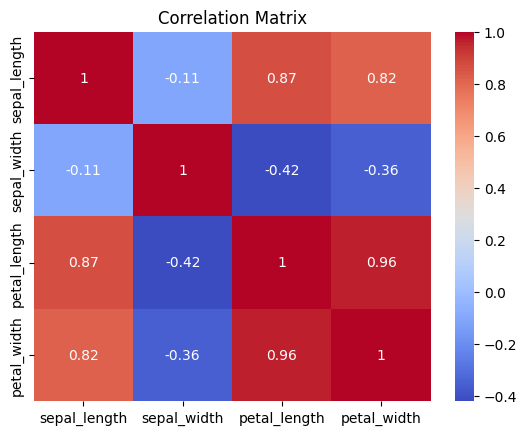

In [346]:
correlation_matrix = iris.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Sepal and Petal Dimensions

- **Sepal Length and Petal Dimensions**:
  - There is a **strong positive correlation** between sepal length and petal dimensions.
  - *Observation*: Flowers with longer sepals tend to have larger petals, indicating that these two features are positively related.

- **Sepal Width and Petal Dimensions**:
  - The width of the sepal shows a **weak negative correlation** with petal size and also with sepal length.
  - *Observation*: This suggests that sepals are usually pointed or elongated, and flowers with wider sepals tend to have smaller petals.


In [347]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

In [348]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
feature_names = iris.columns[:-1]
le = LabelEncoder()
y_encoded = le.fit_transform(y)
feature_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

##Logistic Regression

In [349]:
from sklearn import linear_model

In [350]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred[:3]

array(['setosa', 'setosa', 'virginica'], dtype=object)

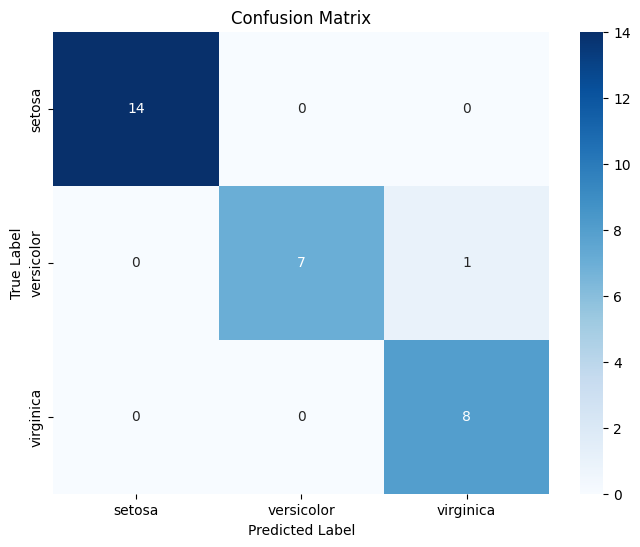

In [351]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [352]:
report = classification_report(y_test, y_pred, target_names=iris['species'].unique())
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93         8
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



##k-Nearest Neighbors (k-NN)

In [353]:
from sklearn.neighbors import KNeighborsClassifier

In [354]:
knn = KNeighborsClassifier(n_neighbors=3)

feature_pairs = [
    (['sepal_length', 'sepal_width'], 'Sepal Length vs Sepal Width'),
    (['petal_length', 'petal_width'], 'Petal Length vs Petal Width')
]

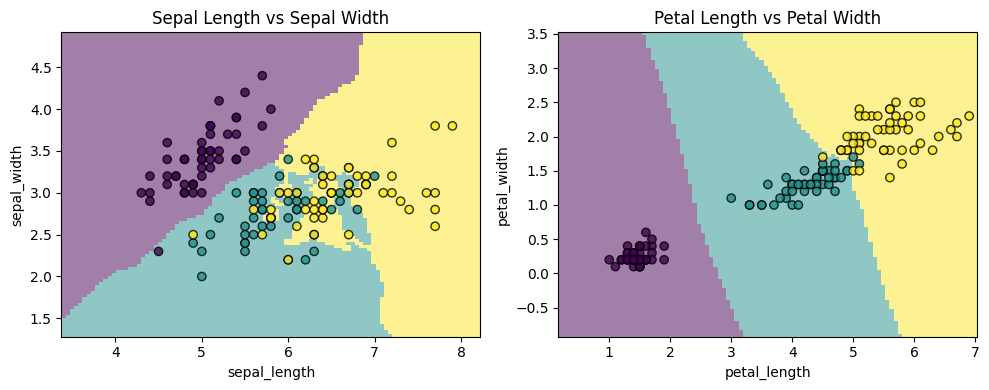

In [355]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for i, (features, title) in enumerate(feature_pairs):
    knn.fit(X_train[features], y_train)

    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_test[features],
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=features[0],
        ylabel=features[1],
        shading="auto",
        alpha=0.5,
        ax=ax[i],
    )

    ax[i].scatter(X[features[0]], X[features[1]], c=y_encoded, alpha=0.8, edgecolor="k")
    ax[i].set_title(f'{title}')
plt.tight_layout()
plt.show()

In [356]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris['species'].unique())
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##Decision Trees

In [357]:
from sklearn import tree

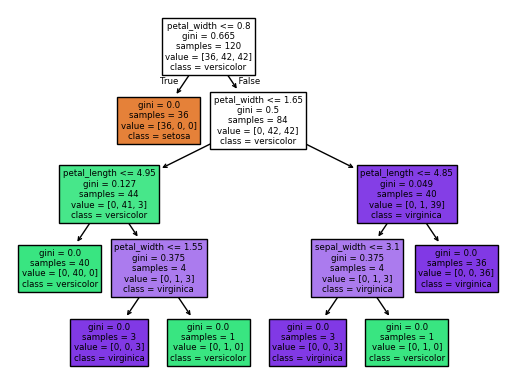

In [358]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
tree.plot_tree(dtc, feature_names=feature_names, class_names=iris['species'].unique(), filled=True)
plt.show()

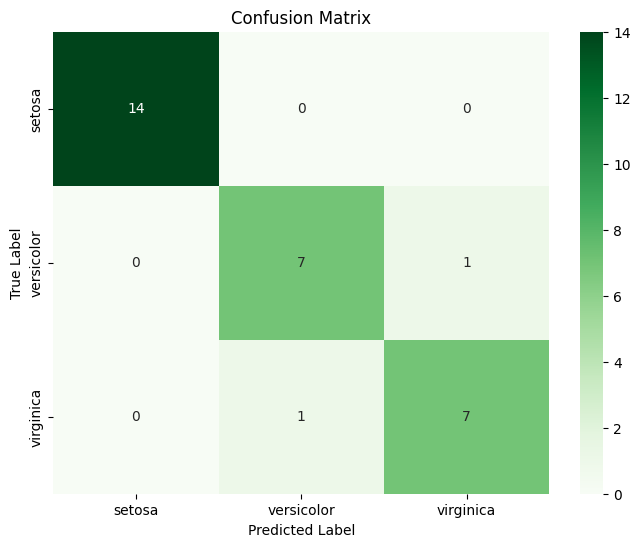

In [359]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Random Forest

In [360]:
from sklearn.ensemble import RandomForestClassifier

In [361]:
rf = RandomForestClassifier(n_estimators=10)

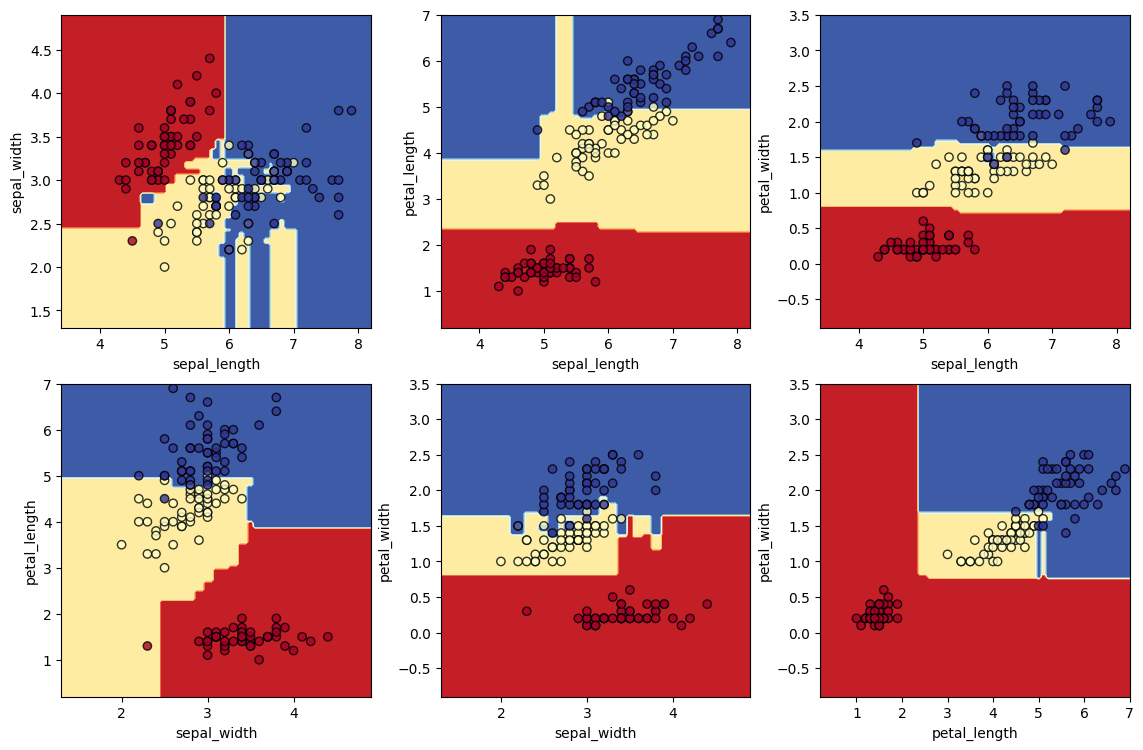

In [362]:
plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    rf.fit(X_train.iloc[:, pair], y_train)

    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        rf,
        X_test.iloc[:, pair],
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=feature_names[pair[0]],
        ylabel=feature_names[pair[1]],
    )
    scatter = ax.scatter(X.iloc[:, pair[0]], X.iloc[:, pair[1]], c=y_encoded, alpha=0.8, edgecolor="k", cmap=plt.cm.RdYlBu)


In [363]:
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris['species'].unique())
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93         8
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



##Support Vector Machines (SVM)

In [364]:
from sklearn import svm

In [365]:
sv = svm.SVC(kernel="linear", C=0.05)
sv.fit(X_train, y_train)
w = sv.coef_
w

array([[-0.0535004 ,  0.31901048, -0.6479834 , -0.25415047],
       [-0.07045884,  0.10666067, -0.47862297, -0.21684346],
       [-0.11      ,  0.065     , -0.84      , -0.655     ]])

In [366]:
b = sv.intercept_
b

array([1.27055607, 1.8749049 , 5.70849895])

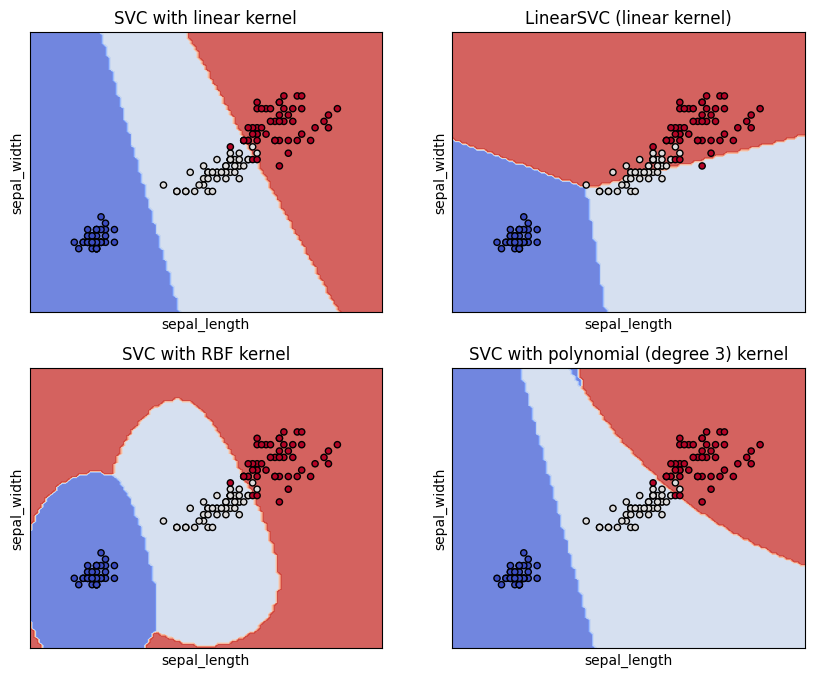

In [367]:
C = 0.05
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (sv.fit(X_train[['petal_length', 'petal_width']], y_train) for sv in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2, figsize=(10, 8))

for sv, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        sv,
        X[['petal_length', 'petal_width']],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=feature_names[0],
        ylabel=feature_names[1],
    )
    ax.scatter(X['petal_length'], X['petal_width'], c=y_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [368]:
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris['species'].unique())
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

